In [3]:

import csv
import os
import shutil
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# TODO: update based on data files path       
inputFile = './ISIC_2019_Training_GroundTruth.csv'
outputFile = 'output.csv'
imagesFolder = 'ISIC_2019_Training_Input/'
filteredImagesFolder = 'filtered_images/'
imagesPaths = []
labels = []

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

os.makedirs(filteredImagesFolder, exist_ok=True)

def printInFormat(arguments):
    print('---------- ' + arguments + '----------')

def filterImageNamesForLabels(csvFile, outputCsvFile, label1Index, label2Index):
    with open(csvFile, 'r', newline='') as infile, open(outputCsvFile, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        melCount = 0
        bccCount = 0
        writer.writerow(['image_name', 'MEL', 'BCC'])
        for row in reader:
            if row[label1Index] == '1.0' or row[label2Index] == '1.0':
                if (row[label1Index] == '1.0'):
                    melCount += 1
                    labels.append(1)
                else:
                    bccCount += 1
                    labels.append(0)
                writer.writerow([row[0], row[label1Index], row[label2Index]])
    printInFormat('There are a total of ' + str(melCount + bccCount) + ' images.')
    printInFormat('MEL image count: ' + str(melCount))
    printInFormat('BCC image count: ' + str(bccCount))
    print(len(labels))

def filterImages(imagesFolder, filteredImagesFolder, filteredCSVFile):
    for row in csv.DictReader(open(filteredCSVFile)):
        imageName = row['image_name'] + '.jpg'
        sourcePath = os.path.join(imagesFolder, imageName)
        destinationPath = os.path.join(filteredImagesFolder, imageName)
        if os.path.isfile(sourcePath):
            shutil.copy(sourcePath, destinationPath)
            imagesPaths.append(destinationPath)
        else: 
            print(sourcePath)


def trainTestSplitDataset(images, labels):
    imageSet = np.array(images)
    labelSet = np.array(labels)
    return train_test_split(imageSet, labelSet, test_size=0.2, random_state=42)






In [2]:
printInFormat('Selecting MEL and BCC images')
filterImageNamesForLabels(inputFile, outputFile, 1, 3)
filterImages(imagesFolder, filteredImagesFolder, outputFile)
print(len(imagesPaths))
print(len(labels))
X_train_path, X_test_path, y_train, y_test = trainTestSplitDataset(imagesPaths, labels)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_df = pd.DataFrame({'image_paths': X_train_path, 'labels': y_train.astype(str)})
test_df = pd.DataFrame({'image_paths': X_test_path, 'labels': y_test.astype(str)})


train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_paths',
    y_col='labels',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_paths',
    y_col='labels',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=32,
    class_mode='binary'
)





---------- Selecting MEL and BCC images----------
---------- There are a total of 7845 images.----------
---------- MEL image count: 4522----------
---------- BCC image count: 3323----------
7845
7845
7845
Found 6276 validated image filenames belonging to 2 classes.
Found 1569 validated image filenames belonging to 2 classes.


In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [4]:
model = Sequential()
model.add(Conv2D(28, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Single output neuron with sigmoid activation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/home/rog-suvab/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-23 20:33:49.272804: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 20:33:49.274210: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
S

In [5]:
history = model.fit(train_generator, epochs=12, validation_data=test_generator)


Epoch 1/12


/home/rog-suvab/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-23 20:33:59.866700: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176633856 exceeds 10% of free system memory.
2024-03-23 20:34:00.722492: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176633856 exceeds 10% of free system memory.


  1/197 ━━━━━━━━━━━━━━━━━━━━ 18:51 6s/step - accuracy: 0.4062 - loss: 0.6954

2024-03-23 20:34:01.057115: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176633856 exceeds 10% of free system memory.
2024-03-23 20:34:01.902761: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176633856 exceeds 10% of free system memory.


  2/197 ━━━━━━━━━━━━━━━━━━━━ 4:01 1s/step - accuracy: 0.4531 - loss: 1.0822 

2024-03-23 20:34:02.241152: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 176633856 exceeds 10% of free system memory.


 64/197 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.5572 - loss: 0.7794

KeyboardInterrupt: 

In [30]:

loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy}')

print(history.history)

50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 687ms/step - accuracy: 0.8163 - loss: 0.5225
Test Accuracy: 0.8196303248405457
{'accuracy': [0.71144038438797, 0.7777246832847595, 0.7973231077194214, 0.81246018409729, 0.8301466107368469, 0.8451243042945862, 0.8585085868835449, 0.8822498321533203, 0.8935627937316895, 0.9058317542076111, 0.9155513048171997, 0.9340344071388245], 'loss': [0.5635977387428284, 0.46099644899368286, 0.43987223505973816, 0.4102511405944824, 0.3762432336807251, 0.343682199716568, 0.3202754259109497, 0.28194332122802734, 0.25497931241989136, 0.22846247255802155, 0.20870190858840942, 0.16613195836544037], 'val_accuracy': [0.7578074932098389, 0.7584448456764221, 0.7941364049911499, 0.7960484623908997, 0.7928617000579834, 0.8202676773071289, 0.8100700974464417, 0.8336520195007324, 0.8317399621009827, 0.8381134271621704, 0.8330146670341492, 0.8196303248405457], 'val_loss': [0.5156062841415405, 0.5307359099388123, 0.4293752610683441, 0.4564569592475891, 0.5204521417617798, 0.4233387112

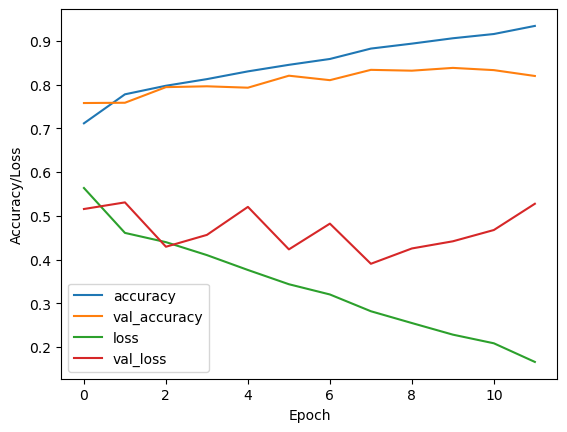

In [31]:
# Plotting accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [38]:
import cv2
import numpy as np

# Load and preprocess the first image
image1 = cv2.imread('./melanoma1.jpg')  # Replace with the actual path to your first image
image1 = cv2.resize(image1, (IMAGE_HEIGHT, IMAGE_WIDTH))
image1 = image1 / 255.0  # Rescale pixel values to [0, 1]
image1 = np.expand_dims(image1, axis=0)  # Add batch dimension
image2 = cv2.imread('./melanoma2.jpg')  # Replace with the actual path to your first image
image2 = cv2.resize(image2, (IMAGE_HEIGHT, IMAGE_WIDTH))
image2 = image2 / 255.0  # Rescale pixel values to [0, 1]
image2 = np.expand_dims(image2, axis=0)  # Add batch dimension
# Load and preprocess the second image
image3 = cv2.imread('./bcc1.jpg')  # Replace with the actual path to your second image
image3 = cv2.resize(image3, (IMAGE_HEIGHT, IMAGE_WIDTH))
image3 = image3 / 255.0  # Rescale pixel values to [0, 1]
image3 = np.expand_dims(image3, axis=0)  # Add batch dimension

image4 = cv2.imread('./bcc2.jpeg')  # Replace with the actual path to your second image
image4 = cv2.resize(image4, (IMAGE_HEIGHT, IMAGE_WIDTH))
image4 = image4 / 255.0  # Rescale pixel values to [0, 1]
image4 = np.expand_dims(image4, axis=0)  # Add batch dimension

# Predict classes for the images
prediction1 = model.predict(image1)
prediction2 = model.predict(image2)
prediction3 = model.predict(image3)
prediction4 = model.predict(image4)

# Print or display the predictions
print('Prediction for the melanoma1 image:', prediction1)
print('Prediction for the melanoma2 image:', prediction2)
print('Prediction for the bcc1 image:', prediction3)
print('Prediction for the bcc2 image:', prediction4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for the melanoma1 image: [[1.]]
Prediction for the melanoma2 image: [[0.99998367]]
Prediction for the bcc1 image: [[0.54928523]]
Prediction for the bcc2 image: [[0.96522427]]
